In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from scipy.stats import zscore

# Upload and read the csv files
ais_df = pd.read_csv("ml_data_daily_2018.csv")

In [2]:
# Look at our data
ais_df.head()

,Unnamed: 0,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable
0,2018/01/01,9,37,145,44,27,13,12,7
1,2018/01/02,13,45,119,41,27,14,19,10
2,2018/01/03,13,44,106,40,36,14,20,11
3,2018/01/04,15,44,103,45,30,10,15,12
4,2018/01/05,10,45,107,41,26,13,21,10


In [3]:
# # Renaming the "Unnamed:0" column to "Date"
ais_df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
ais_df.head()

,Date,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable
0,2018/01/01,9,37,145,44,27,13,12,7
1,2018/01/02,13,45,119,41,27,14,19,10
2,2018/01/03,13,44,106,40,36,14,20,11
3,2018/01/04,15,44,103,45,30,10,15,12
4,2018/01/05,10,45,107,41,26,13,21,10


In [4]:
# Check the info of the DataFrame to see the type of data in each column and to make sure we have clean data
ais_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          365 non-null    object
 1   Fishing       365 non-null    int64 
 2   TugTow        365 non-null    int64 
 3   Recreational  365 non-null    int64 
 4   Passenger     365 non-null    int64 
 5   Cargo         365 non-null    int64 
 6   Tanker        365 non-null    int64 
 7   Other         365 non-null    int64 
 8   Unavailable   365 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 25.8+ KB


In [5]:
# # Convert "Date" to datetime
ais_df['Date']=pd.to_datetime(ais_df['Date'])

# And recheck info
ais_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          365 non-null    datetime64[ns]
 1   Fishing       365 non-null    int64         
 2   TugTow        365 non-null    int64         
 3   Recreational  365 non-null    int64         
 4   Passenger     365 non-null    int64         
 5   Cargo         365 non-null    int64         
 6   Tanker        365 non-null    int64         
 7   Other         365 non-null    int64         
 8   Unavailable   365 non-null    int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 25.8 KB


In [6]:
# Creating a total column for our data
ais_df['Total']= ais_df.sum(numeric_only=True, axis=1)
ais_df.head()

,Date,Fishing,TugTow,Recreational,Passenger,Cargo,Tanker,Other,Unavailable,Total
0,2018-01-01,9,37,145,44,27,13,12,7,294
1,2018-01-02,13,45,119,41,27,14,19,10,288
2,2018-01-03,13,44,106,40,36,14,20,11,284
3,2018-01-04,15,44,103,45,30,10,15,12,274
4,2018-01-05,10,45,107,41,26,13,21,10,273


In [7]:
# Check the info one last time now that we have our new column
ais_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          365 non-null    datetime64[ns]
 1   Fishing       365 non-null    int64         
 2   TugTow        365 non-null    int64         
 3   Recreational  365 non-null    int64         
 4   Passenger     365 non-null    int64         
 5   Cargo         365 non-null    int64         
 6   Tanker        365 non-null    int64         
 7   Other         365 non-null    int64         
 8   Unavailable   365 non-null    int64         
 9   Total         365 non-null    int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 28.6 KB


In [8]:
# Create nine DataFrames, each with the Date and one unique column:

# Fishing
ais_fishing_df = ais_df.loc[:, ['Date', 'Fishing']]
#ais_fishing_df = ais_df.loc[:, ['Fishing']]

# TugTow
ais_tugtow_df = ais_df.loc[:, ['Date', 'TugTow']]
#ais_tugtow_df = ais_df.loc[:, ['TugTow']]

# Recreational
ais_recreational_df = ais_df.loc[:, ['Date', 'Recreational']]
#ais_recreational_df = ais_df.loc[:, ['Recreational']]

# Passenger
ais_passenger_df = ais_df.loc[:, ['Date', 'Passenger']]
#ais_passenger_df = ais_df.loc[:, ['Passenger']]

# Cargo
ais_cargo_df = ais_df.loc[:, ['Date', 'Cargo']]
#ais_cargo_df = ais_df.loc[:, ['Cargo']]

# Tanker
ais_tanker_df = ais_df.loc[:, ['Date', 'Tanker']]
#ais_tanker_df = ais_df.loc[:, ['Tanker']]

# Other
ais_other_df = ais_df.loc[:, ['Date', 'Other']]
#ais_other_df = ais_df.loc[:, ['Other']]

# Unavailable
ais_unavailable_df = ais_df.loc[:, ['Date', 'Unavailable']]
#ais_unavailable_df = ais_df.loc[:, ['Unavailable']]

# Total
ais_total_df = ais_df.loc[:, ['Date', 'Total']]
#ais_total_df = ais_df.loc[:, ['Total']]

In [9]:
# From here we will be using 'Total' as an example, and repeating the code for the rest of the data

# Check the new Dataframe
ais_total_df

,Date,Total
0,2018-01-01,294
1,2018-01-02,288
2,2018-01-03,284
3,2018-01-04,274
4,2018-01-05,273
...,...,...
360,2018-12-27,298
361,2018-12-28,298
362,2018-12-29,306
363,2018-12-30,308


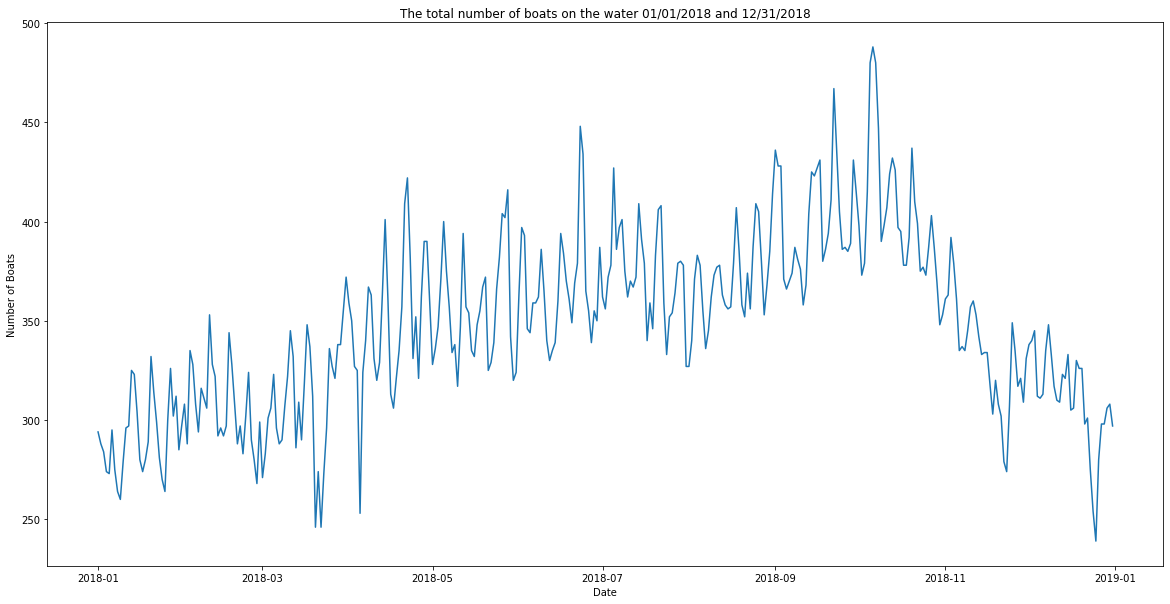

In [10]:
# Examine our data through visualization

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(ais_total_df.Date, ais_total_df.Total)
plt.xlabel('Date')
plt.ylabel('Number of Boats')
plt.title('The total number of boats on the water 01/01/2018 and 12/31/2018')
plt.show()

<AxesSubplot:>

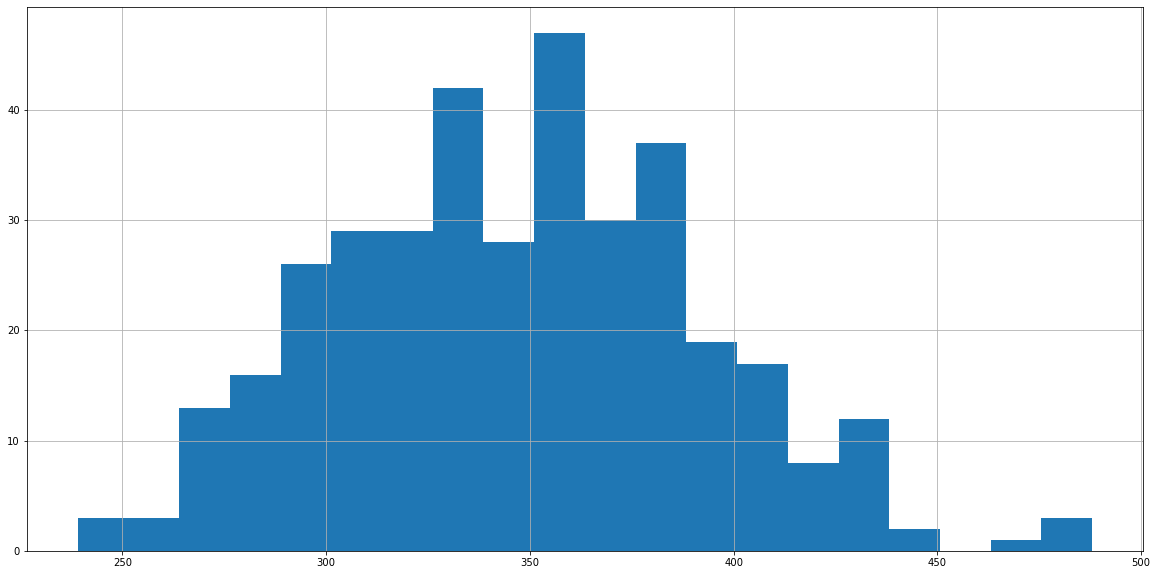

In [11]:
# Break the data into histograms
ais_total_df.Total.hist(bins=20)

In [13]:
# Check for outliers

total_zscores = zscore(ais_total_df.Total)
total_outliers = pd.Series(total_zscores).apply(lambda x: x <= -2.5 or x >= 2.5)

ais_total_df[total_outliers]

,Date,Total
264,2018-09-22,467
277,2018-10-05,480
278,2018-10-06,488
279,2018-10-07,480


In [ ]:
# We will remove our outliers, and replace them with the averages of 